Importing libraries

In [22]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

URL address of the website we wish to scrape the data from

In [23]:
url = "https://books.toscrape.com/catalogue/page-1.html"

Getting the response from the address and obtain the content. thereafter parse it into html using BeautifulSoup

In [24]:
response = requests.get(url)
response  = response.content
soup = BeautifulSoup(response,'html.parser')

Get the ordinary list that contains the article in which the contents of the data we wish to scrape are contained

In [25]:
ol = soup.find('ol')
articles = ol.find_all('article',class_ = 'product_pod')

Performing the above process across the 50 pages of the website starting from page 1

In [26]:
books = []
for i in range(1,51):
    url = f"https://books.toscrape.com/catalogue/page-{i}.html"
    response = requests.get(url)
    response = response.content
    soup = BeautifulSoup(response,'html.parser')
    ol = soup.find('ol')
    articles = ol.find_all('article',class_ = 'product_pod')
    
    
    for article in articles:
        image = article.find('img')
        title = image.attrs['alt']
        star_rating = article.find('p')
        star_rating = star_rating['class'][1]
        price = article.find('p',class_ = 'price_color').text
        price = float(price[1:])
        books.append([title,price,star_rating])

Having scarped our data from website,lets create a pandas dataframe and make a csv file from it

In [39]:
df = pd.DataFrame(books,columns=['Title','Price','Star_Rating'])
df.to_csv("Books.csv")

Reading the csv file

In [40]:
books_df = pd.read_csv("Books.csv")
books_df.head()

,Unnamed: 0,Title,Price,Star_Rating
0,0,A Light in the Attic,51.77,Three
1,1,Tipping the Velvet,53.74,One
2,2,Soumission,50.10,One
3,3,Sharp Objects,47.82,Four
4,4,Sapiens: A Brief History of Humankind,54.23,Five


In [41]:
books_df.shape

(1000, 4)

In [42]:
books_df['Title'].unique()

array(['A Light in the Attic', 'Tipping the Velvet', 'Soumission',
       'Sharp Objects', 'Sapiens: A Brief History of Humankind',
       'The Requiem Red',
       'The Dirty Little Secrets of Getting Your Dream Job',
       'The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull',
       'The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics',
       'The Black Maria',
       'Starving Hearts (Triangular Trade Trilogy, #1)',
       "Shakespeare's Sonnets", 'Set Me Free',
       "Scott Pilgrim's Precious Little Life (Scott Pilgrim #1)",
       'Rip it Up and Start Again',
       'Our Band Could Be Your Life: Scenes from the American Indie Underground, 1981-1991',
       'Olio', 'Mesaerion: The Best Science Fiction Stories 1800-1849',
       'Libertarianism for Beginners', "It's Only the Himalayas",
       'In Her Wake', 'How Music Works',
       'Foolproof Preserving: A Guide to Small Batch Jams, Jellies, Pickle

In [43]:
len(books_df['Title'].unique())

999

In [44]:
books_df['Star_Rating'].value_counts()

One      226
Three    203
Five     196
Two      196
Four     179
Name: Star_Rating, dtype: int64

In [45]:
#lets drop the columns
books_df.drop(columns = 'Unnamed: 0',inplace = True)
books_df.tail()

,Title,Price,Star_Rating
995,Alice in Wonderland (Alice's Adventures in Won...,55.53,One
996,"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",57.06,Four
997,A Spy's Devotion (The Regency Spies of London #1),16.97,Five
998,1st to Die (Women's Murder Club #1),53.98,One
999,"1,000 Places to See Before You Die",26.08,Five


In [46]:
#renaming the columns
books_df.rename(columns = {'Star_Rating' : 'star_rating','Title' :'title'},inplace = True)
books_df.head()

,title,Price,star_rating
0,A Light in the Attic,51.77,Three
1,Tipping the Velvet,53.74,One
2,Soumission,50.10,One
3,Sharp Objects,47.82,Four
4,Sapiens: A Brief History of Humankind,54.23,Five


In [47]:
# convert numeric words to numbers of rating column
books_df['star_rating'] = books_df['star_rating'].map({'One' : 1,'Two': 2,'Three': 3,'Four': 4,'Five': 5})
books_df.head()

,title,Price,star_rating
0,A Light in the Attic,51.77,3
1,Tipping the Velvet,53.74,1
2,Soumission,50.10,1
3,Sharp Objects,47.82,4
4,Sapiens: A Brief History of Humankind,54.23,5


In [48]:
books_df['star_rating'].value_counts().sort_index()

1    226
2    196
3    203
4    179
5    196
Name: star_rating, dtype: int64

<AxesSubplot:>

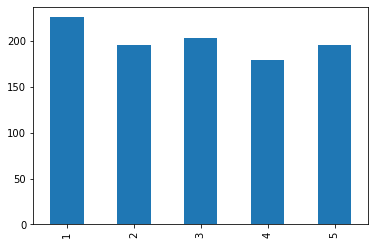

In [51]:
books_df['star_rating'].value_counts().sort_index().plot(kind = 'bar')

In [50]:
books_df['title'].value_counts()

The Star-Touched Queen                                        2
A Light in the Attic                                          1
Harry Potter and the Prisoner of Azkaban (Harry Potter #3)    1
Some Women                                                    1
Shopaholic Ties the Knot (Shopaholic #3)                      1
                                                             ..
Angels Walking (Angels Walking #1)                            1
Angels & Demons (Robert Langdon #1)                           1
All the Light We Cannot See                                   1
Adulthood Is a Myth: A "Sarah's Scribbles" Collection         1
1,000 Places to See Before You Die                            1
Name: title, Length: 999, dtype: int64